## LBVAR Symmetry

In [1]:
# 설치 없이 상태경로로 모듈을 가져오는 부분입니다
import sys
import os
parent_dir = os.path.abspath("../")
sys.path.append(parent_dir)

import bok_da

In [1]:
import bok_da
import pandas as pd

In [2]:
# # large 데이터 로드
# df = pd.read_excel("data/Differed_Data.xlsx", index_col=0)
df = pd.read_excel("../data/Differed_Data_Selected.xlsx", index_col=0)

# 일부 컬럼만 사용 (138개 중)
col_limit = 10
df = df.iloc[:, :col_limit]

df.head()

,Nominal_GDP,Total_Save,Household_Spending,Government_Spending,Foreign_Store,GDP_Deflator,Dollor_Won,Call,Treasury_Bond,PPI
Time,,,,,,,,,,
2000-03-01,15.364291,14.268692,15.159773,13.792548,59.403704,4.271157,7.007678,4.981847,8.939529,4.331653
2000-06-01,15.379320,14.304766,15.162181,13.823710,62.638977,4.271062,7.010601,5.036268,8.740849,4.326303
2000-09-01,15.402900,14.328262,15.162124,13.911984,63.234487,4.279456,7.033930,5.127937,8.204702,4.331350
2000-12-01,15.390514,14.292919,15.149745,13.830700,66.431507,4.291200,7.066415,5.356287,7.313966,4.336247
2001-03-01,15.405731,14.300737,15.171157,13.872958,69.774888,4.303751,7.131962,5.167332,5.635832,4.331585


In [3]:
from bok_da.ts.lbvar import LBVAR_Symmetry

model = LBVAR_Symmetry(p=4, ndraws=10000, verbose=True, hyperparameter_opt=2, optimization_method=0)

> Initializing Model...
  - Trend: 1
  - p(lag): 4
  - Number of Draws: 10000
  - Hyperparameter Optimization: 2
  - Optimization Method: 0
  - Verbose: True


In [4]:
model.fit(df)

> Optimizing objective function using scipy Optimization Method
> Optimized Hyperparameters are [6.0000e-02 1.3070e+00 8.0879e+01 2.5000e-02 2.0580e+00]
> Hyperparameter Optimization Start


Hyperparameter MCMC: 100%|██████████| 10000/10000 [00:28<00:00, 347.36it/s]


> Hyperparameter Optimization Clear
> Opt Hyperparameters are [5.9000e-02 1.2980e+00 8.1286e+01 2.0550e+00 4.9510e+00]
> Prior Making (Symmetric)
> Posterior Draw (Symmetric)


Posterior Draw: 100%|██████████| 10000/10000 [00:04<00:00, 2497.25it/s]


In [5]:
model.Draw.variable_summary()

added | variable  | type    |   size(KB) | info
----------------------------------------------------
    1 | Sigma     | ndarray |   7812.641 | shape=(10, 10, 10000)
    2 | Bet_Prime | ndarray |  32031.391 | shape=(41, 10, 10000)
    3 | Bet       | ndarray |  32031.391 | shape=(10, 41, 10000)
    4 | U_B       | ndarray |  71875.141 | shape=(92, 10, 10000)


In [6]:
forecast_results = model.forecast(forecast_period=4)

# 예측 결과 확인
print(forecast_results.Mean)

> Forecast Start


100%|██████████| 10000/10000 [00:01<00:00, 7450.83it/s]

[[ 16.08558871  15.01477924  15.7742964   14.85283499  97.32064271
    4.73873834   7.23679407   3.23357504   3.21250677   4.77283613]
 [ 16.08185841  15.01234019  15.76556519  14.87757872  98.06784239
    4.74809365   7.28562404   2.76884386   2.93752791   4.7753149 ]
 [ 16.07816531  15.01013685  15.75693576  14.90319658  99.47991009
    4.75719382   7.33802887   2.25763131   2.57663918   4.77533167]
 [ 16.07440419  15.00793281  15.75021924  14.92060096 101.13128518
    4.76525932   7.37989483   1.71199527   2.26786216   4.77248002]]


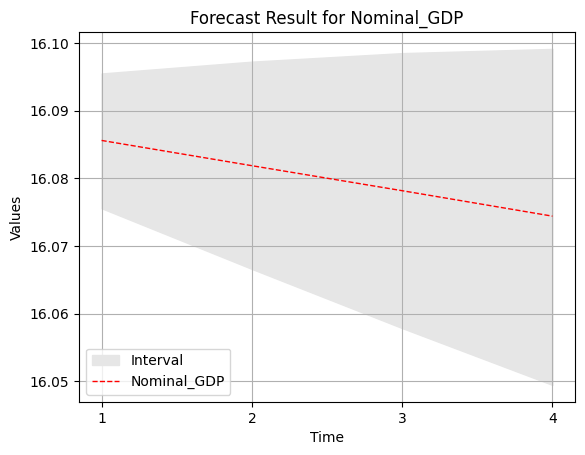

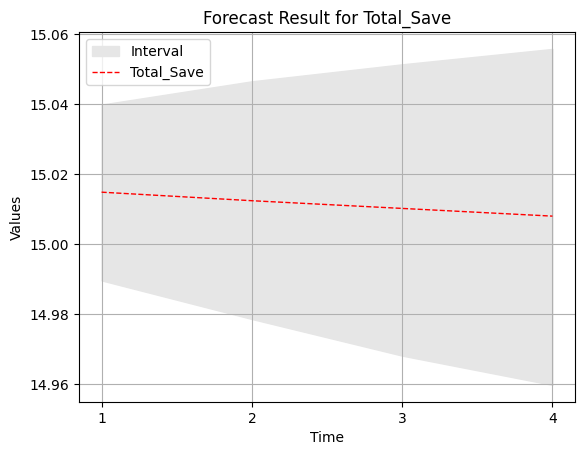

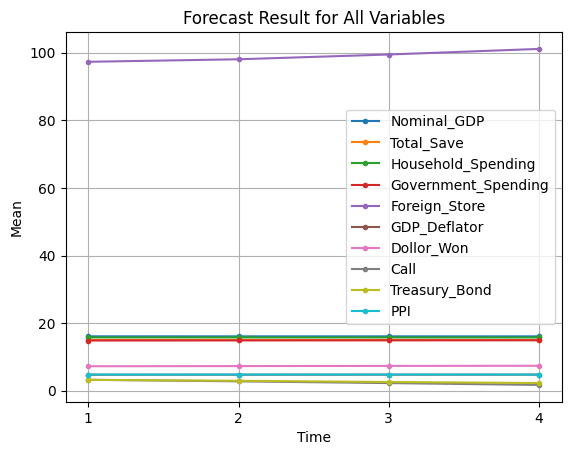

In [7]:
model.print_forecast(plot_index=[1, 2], column_names=df.columns)

In [8]:
model.recursive_irf()

> Impulse Response Calculating...


2/2: 100%|██████████| 10/10 [00:04<00:00,  2.29it/s]


> Forecast error variance decomposition Calculating...


4/4: 100%|██████████| 10000/10000 [00:00<00:00, 16684.70it/s]


> Historical Decomposition Calculating...


3/3: 100%|██████████| 10000/10000 [08:30<00:00, 19.59it/s]


> Done.


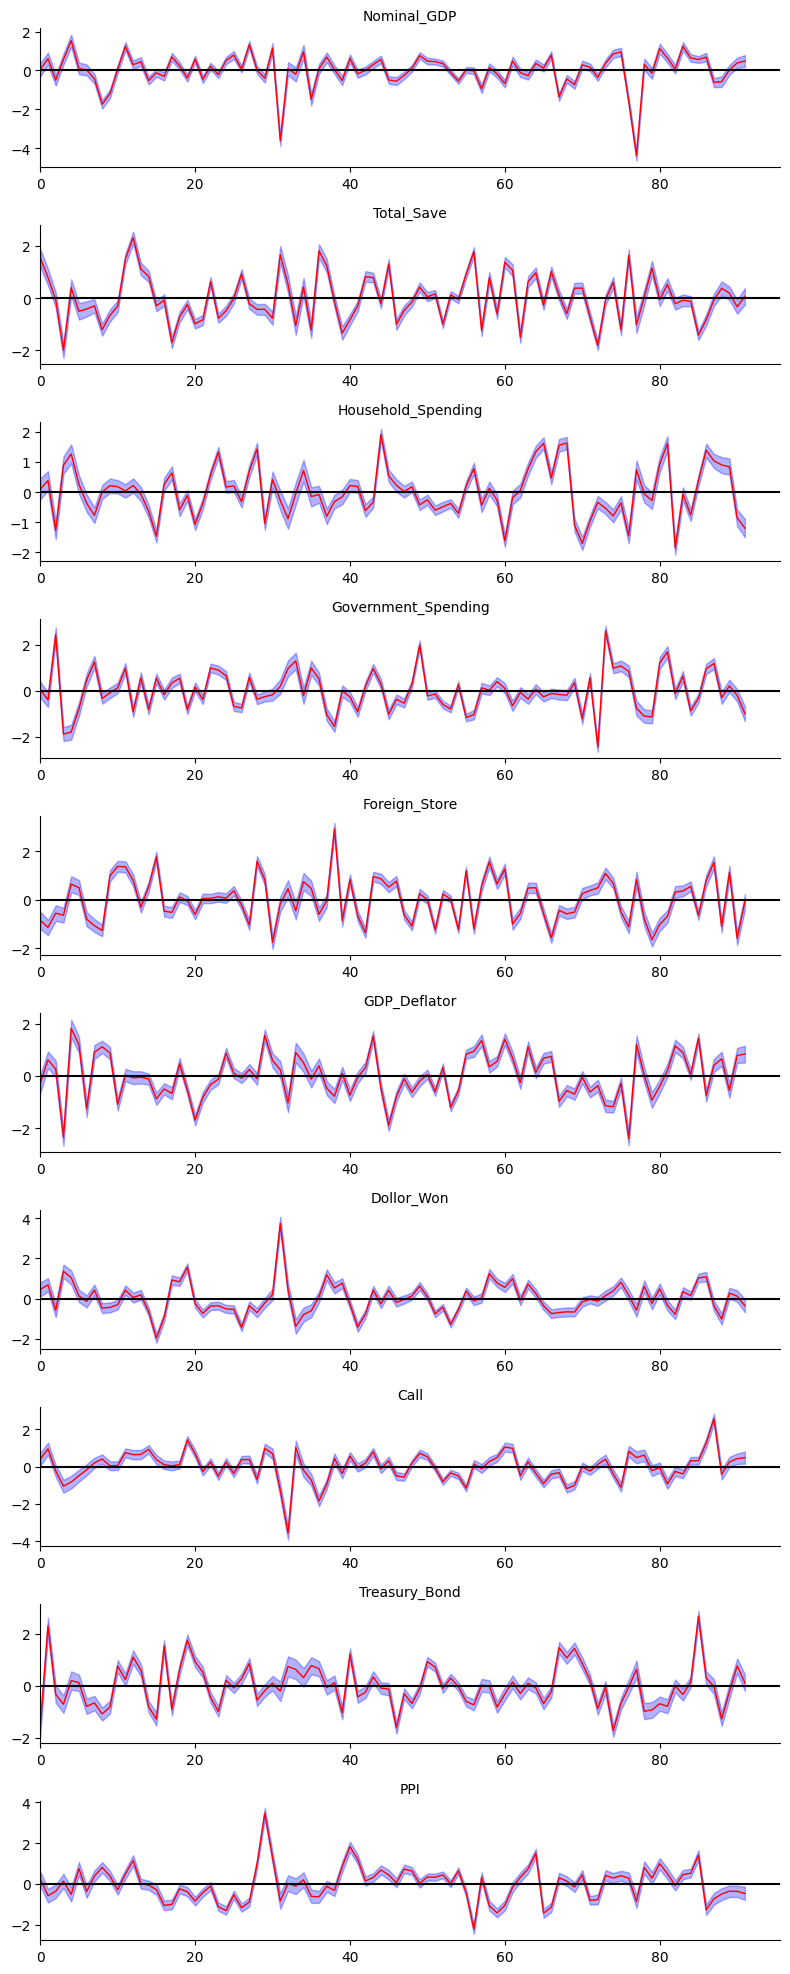

In [9]:
model.plot_irf_shock_series(df.columns)

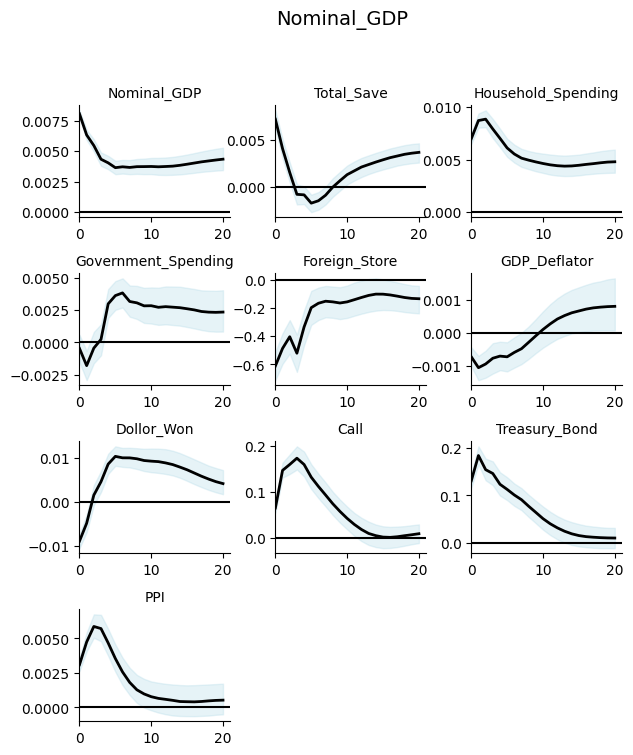

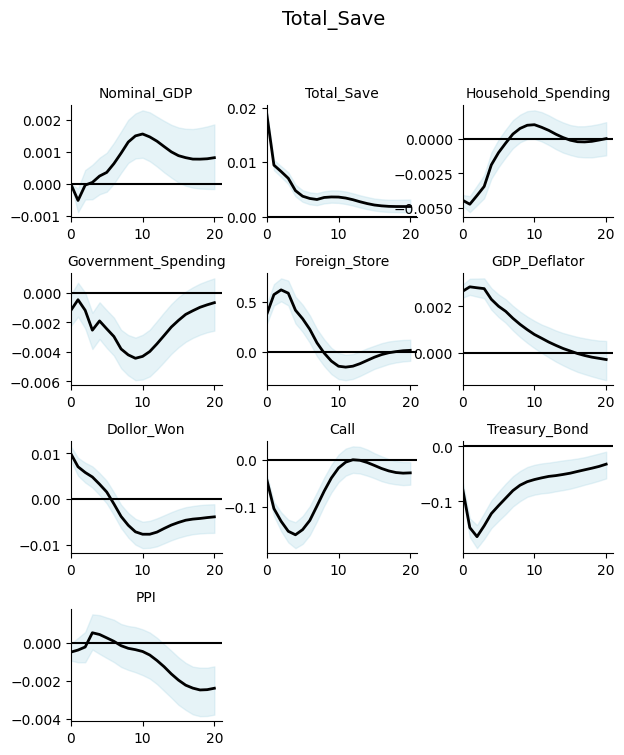

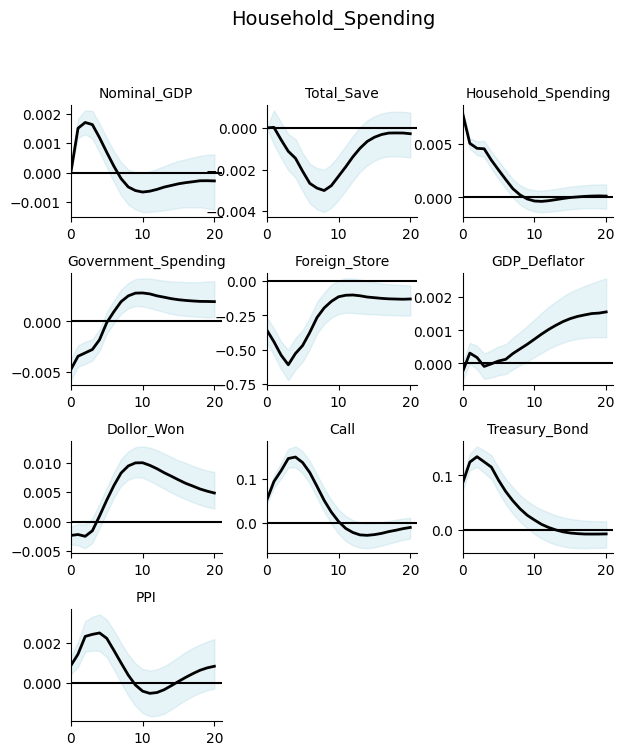

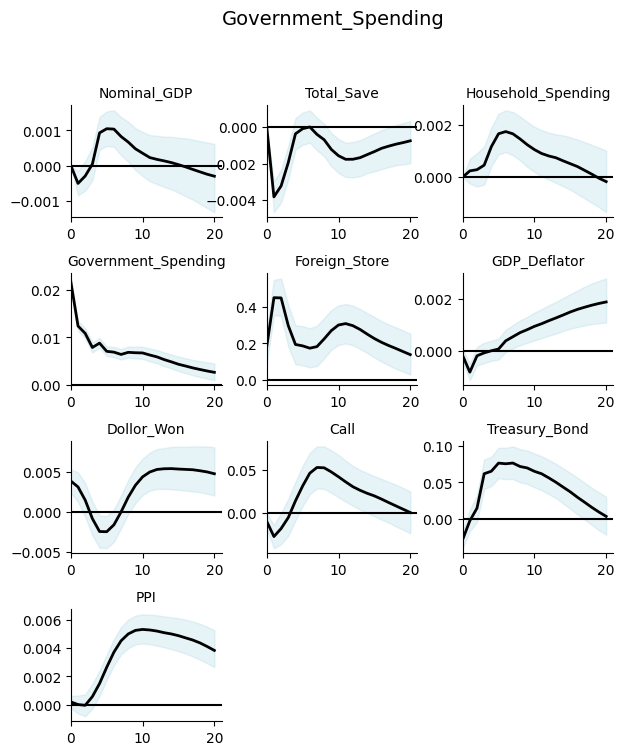

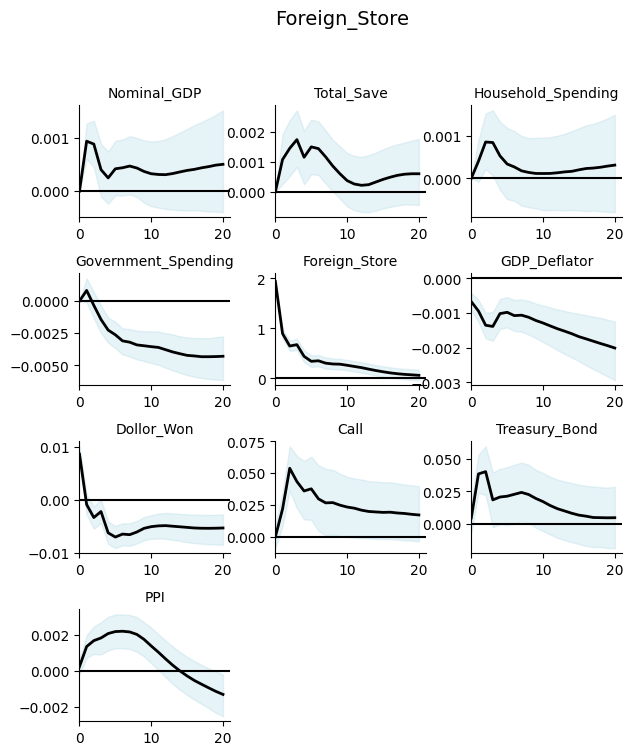

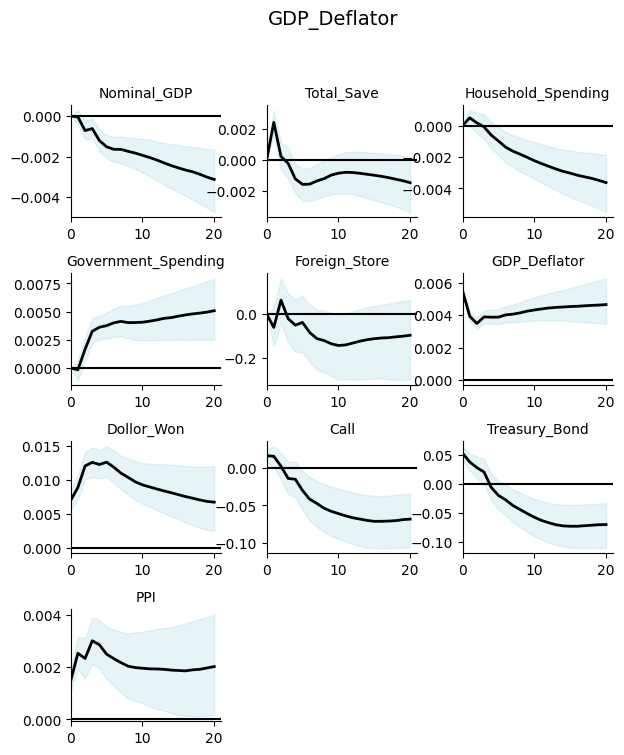

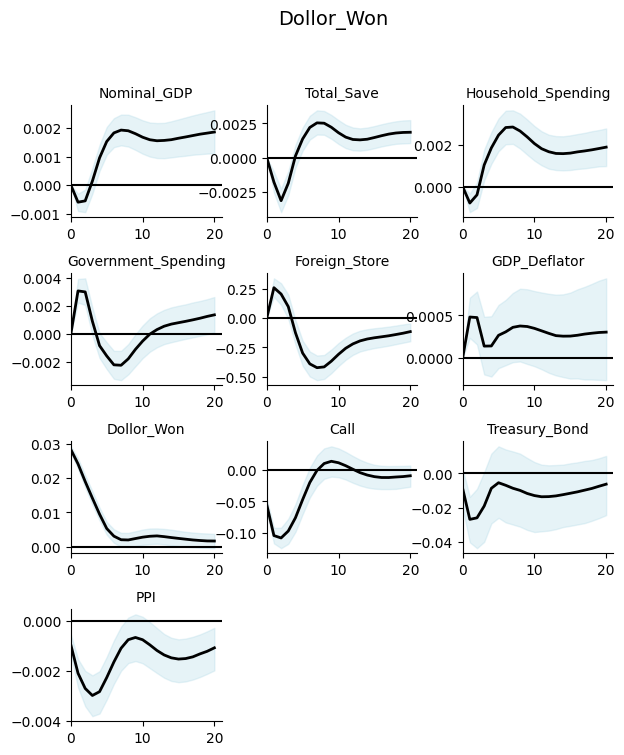

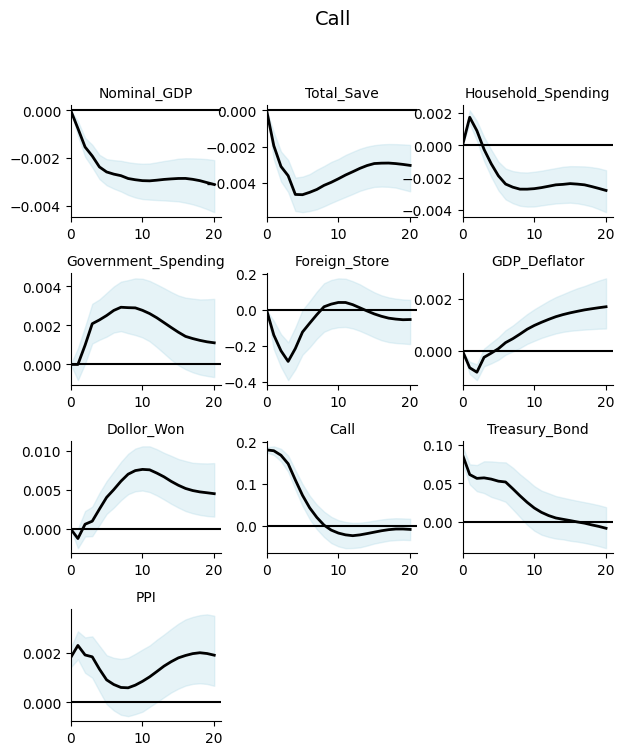

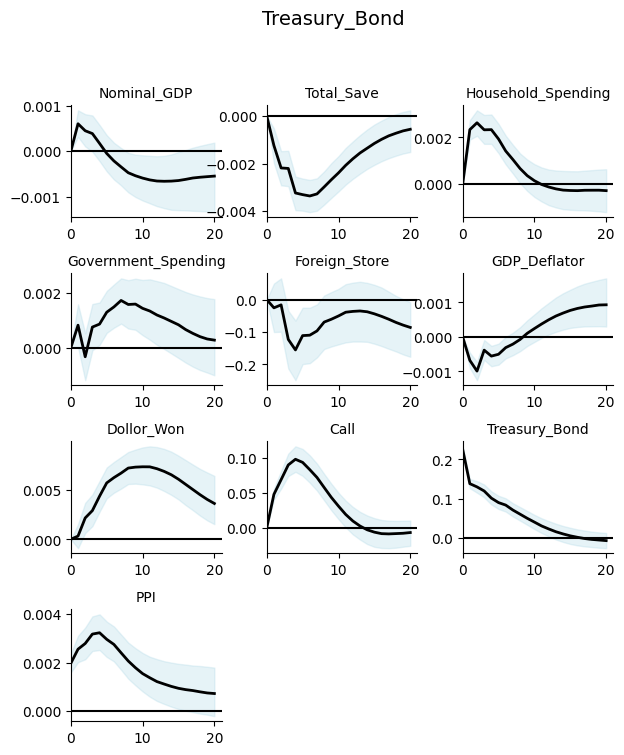

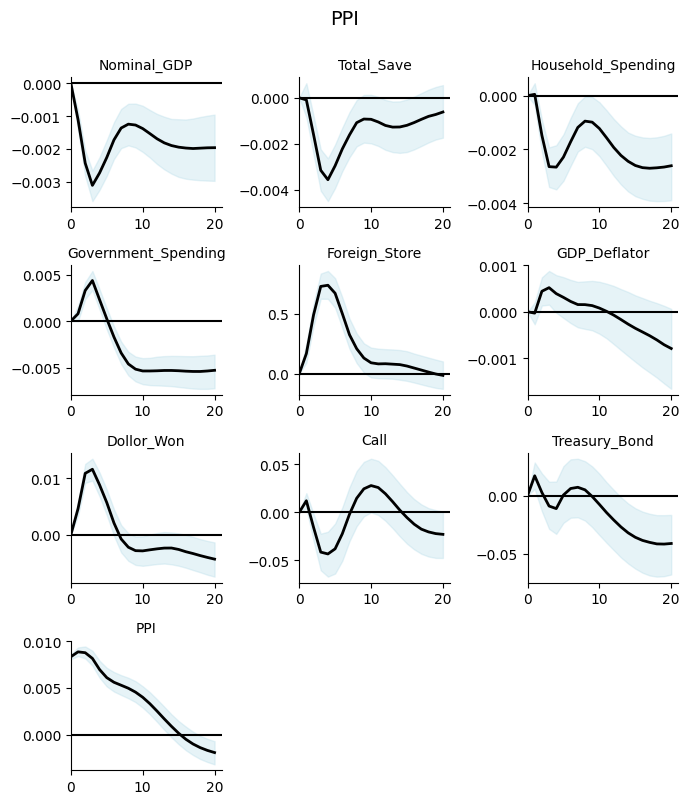

In [10]:
model.plot_irf_impulse_response(df.columns)

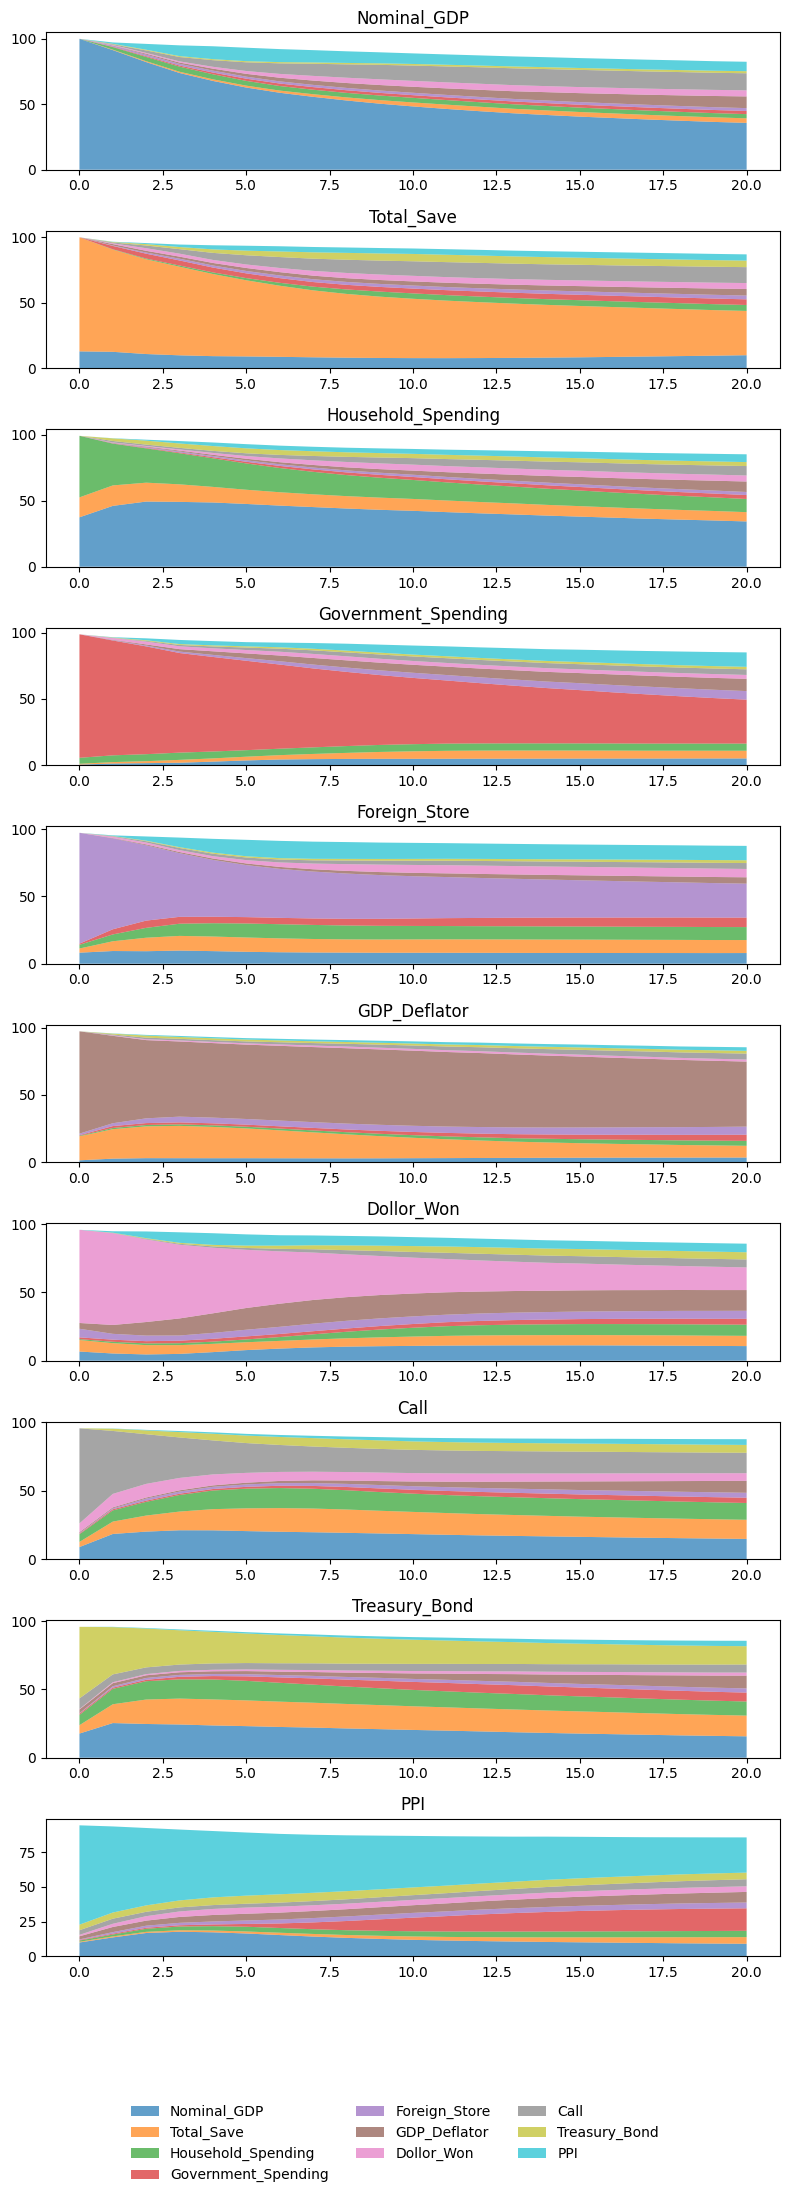

In [11]:
model.plot_irf_FEVD(df.columns)

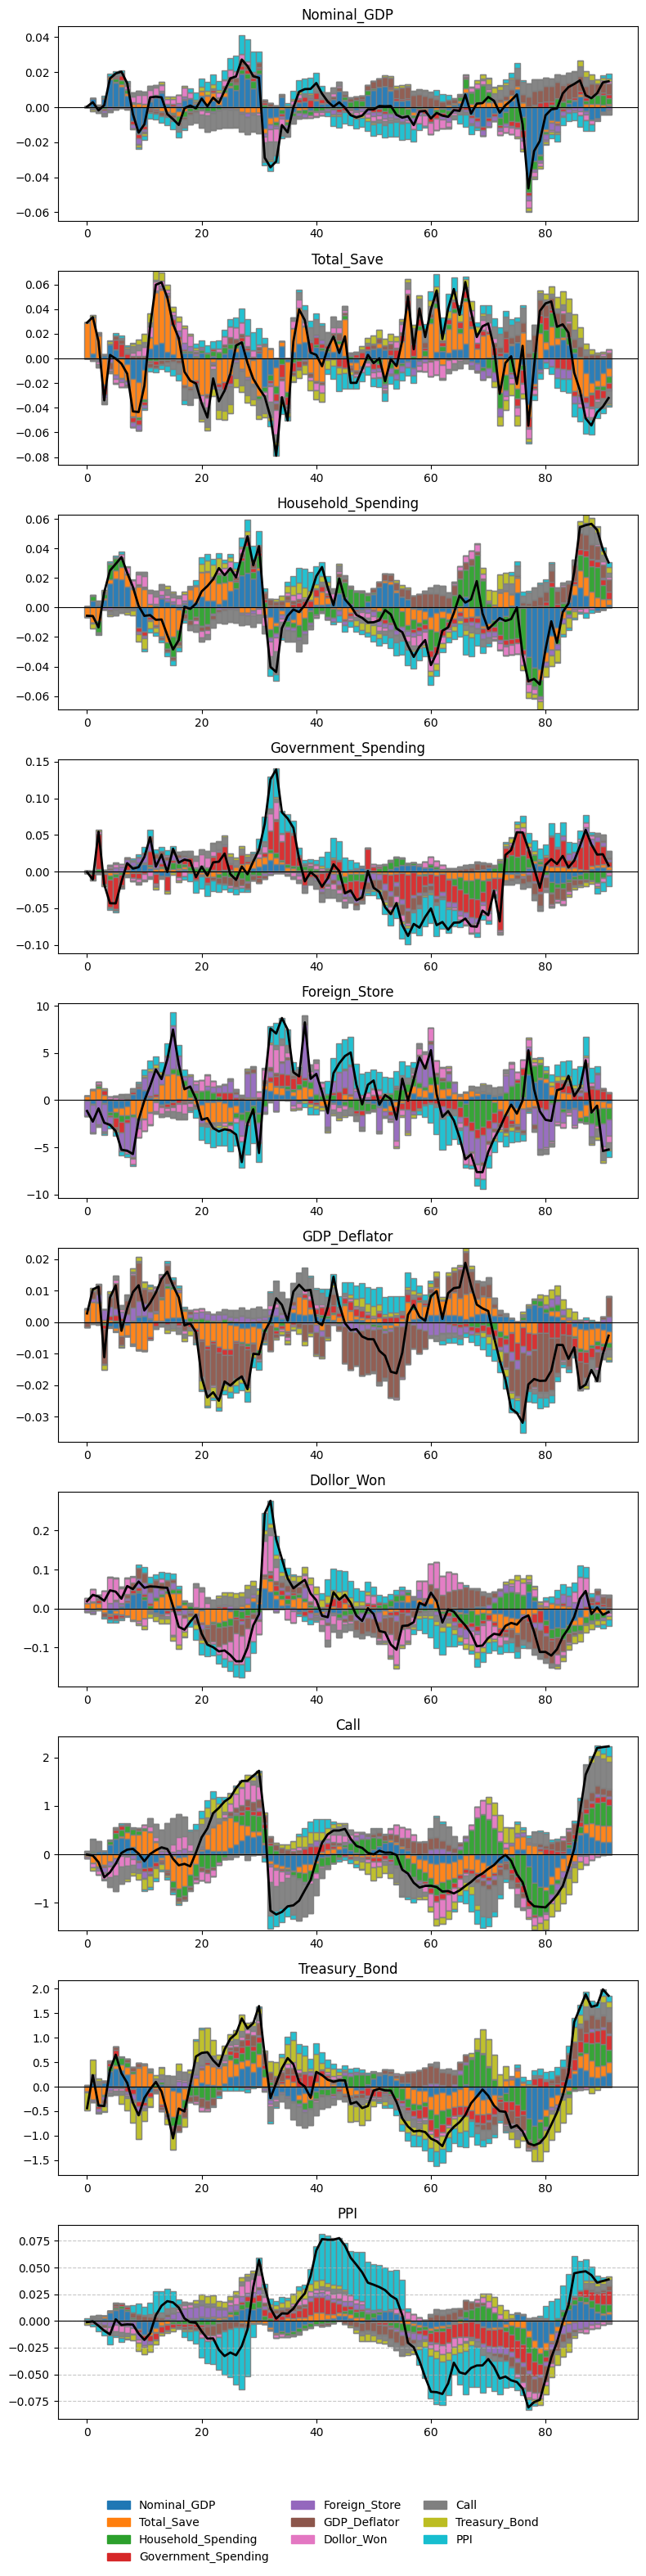

In [12]:
model.plot_irf_historical_decomposition(df.columns)